In [1]:
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from data335 import lm, stan_lm, bambi_lm, mad, plot_regression_line

In [152]:
df = pd.read_csv(
    "../data/earnings.csv", usecols=["weight", "height", "male", "ethnicity"]
).dropna()
df

,height,weight,male,ethnicity
0,74,210.0,1,White
1,66,125.0,0,White
2,64,126.0,0,White
3,65,200.0,0,White
4,63,110.0,0,Other
...,...,...,...,...
1811,61,120.0,0,White
1812,64,130.0,0,White
1813,72,194.0,1,White
1814,63,155.0,0,Other


In [153]:
ethnicities = pd.get_dummies(df["ethnicity"])
ethnicities

,Black,Hispanic,Other,White
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
1811,False,False,False,True
1812,False,False,False,True
1813,False,False,False,True
1814,False,False,True,False


In [162]:
X = pd.concat([df[["height", "male"]], ethnicities], axis=1)
y = df["weight"]
X
model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(-105.81367899329868,
 array([ 3.85213496, 12.1063201 ,  5.90126453, -0.25104753, -6.36009046,
         0.70987346]))

In [157]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ height + male + Black + Hispanic + Other + White", data)
fit

/Users/mgreenbe/DATA335W2025/code/data335.py:113: RuntimeWarning: invalid value encountered in sqrt
  coef_se = se * np.sqrt(unscaled_coef_cov.diagonal())


,estimate,standard error,t-statistic,p-value
Intercept,4422.546875,NaN,NaN,NaN
height,20.263449,19.350139,1.047199,0.29515
male,-102.423275,152.586856,-0.671246,0.502151
Black,-3404.750000,NaN,NaN,NaN
Hispanic,-1145.609375,NaN,NaN,NaN
Other,-2942.593750,NaN,NaN,NaN
White,-3655.765625,NaN,NaN,NaN
sigma,2189.603175,,,


In [158]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ height + male + Black + Hispanic + Other", data)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-105.103806,16.3732,-6.419258,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
Black,5.191391,2.267693,2.289283,0.022179
Hispanic,-0.960921,2.939356,-0.326915,0.74377
Other,-7.069964,4.784855,-1.477571,0.139699
sigma,28.636333,,,


In [163]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ 0 + height + male + Black + Hispanic + Other + White", data)
fit

,estimate,standard error,t-statistic,p-value
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
Black,-99.912414,16.44868,-6.07419,0.0
Hispanic,-106.064727,16.265595,-6.520802,0.0
Other,-112.173769,16.620302,-6.749201,0.0
White,-105.103806,16.3732,-6.419258,0.0
sigma,28.636333,,,


In [165]:
fit = lm("weight ~ height + male + C(ethnicity)", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-99.912414,16.44868,-6.07419,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
C(ethnicity)[T.Hispanic],-6.152312,3.555277,-1.730473,0.083719
C(ethnicity)[T.Other],-12.261355,5.184896,-2.364822,0.018145
C(ethnicity)[T.White],-5.191391,2.267693,-2.289283,0.022179
sigma,28.636333,,,


In [168]:
data = df.copy()
data["ethnicity"] = df["ethnicity"].astype("category")
fit = lm("weight ~ height + male + ethnicity", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-99.912414,16.44868,-6.07419,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
ethnicity[T.Hispanic],-6.152312,3.555277,-1.730473,0.083719
ethnicity[T.Other],-12.261355,5.184896,-2.364822,0.018145
ethnicity[T.White],-5.191391,2.267693,-2.289283,0.022179
sigma,28.636333,,,


In [173]:
data["ethnicity"] = data["ethnicity"].cat.reorder_categories(
    ["White", "Black", "Hispanic", "Other"]
)
data["ethnicity"].cat.categories

Index(['White', 'Black', 'Hispanic', 'Other'], dtype='object')

In [175]:
fit = lm("weight ~ height + male + ethnicity", data)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-105.103806,16.3732,-6.419258,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
ethnicity[T.Black],5.191391,2.267693,2.289283,0.022179
ethnicity[T.Hispanic],-0.960921,2.939356,-0.326915,0.74377
ethnicity[T.Other],-7.069964,4.784855,-1.477571,0.139699
sigma,28.636333,,,


### Residual plots

- Residuals:
  $$
  r_i = y_i - (\hat{\beta}_0x_0 + \hat{\beta}_1 x_1 + \cdots + \hat{\beta}_{n-1}x_{n-1})
  $$

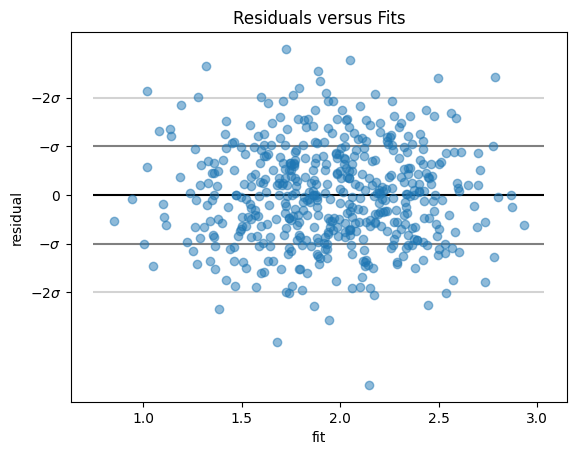

In [178]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
e = rng.normal(size=n)
y = X @ b + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y_pred, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

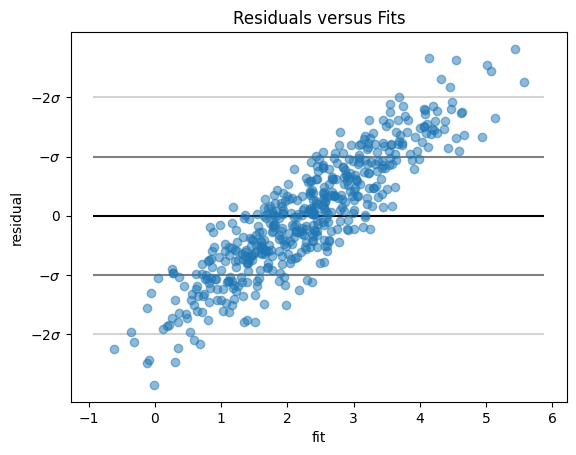

In [ ]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
e = rng.normal(size=n)
y = X @ b + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

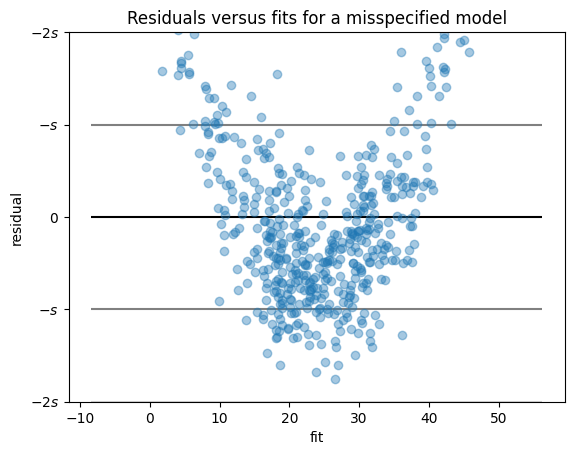

In [ ]:
n = 500
p = 10
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
b = 2 * rng.uniform(size=p)
e = rng.normal(size=n)
y = (X @ b) ** 2 + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r = y - y_pred
s = r.std()

plt.plot(y_pred, r, "o", alpha=0.4)
plt.ylim(-3, 3)
plt.hlines(
    [-2 * s, -s, 0, s, 2 * s],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks([-2 * s, -s, 0, s, 2 * s], ["$-2s$", "$-s$", "$0$", "$-s$", "$-2s$"])
plt.title("Residuals versus fits for a misspecified model")
plt.xlabel("fit")
plt.ylabel("residual")

plt.show()

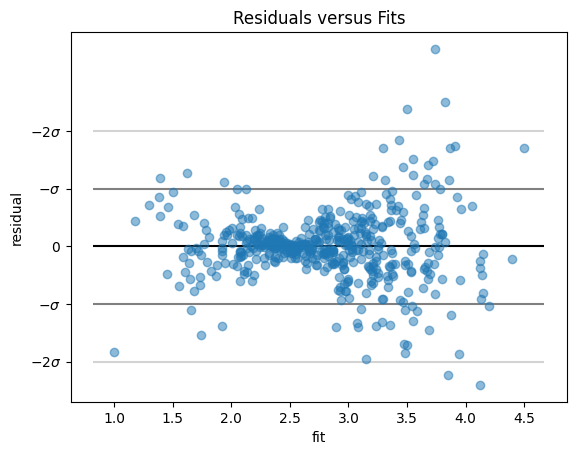

In [199]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
y = X @ b
y = y + (y - 2.5) * rng.normal(size=n)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y_pred, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

In [198]:
y.mean()

2.589869937769013

In [186]:
def make_data():
    n = 500
    np.random.seed(0)
    age = np.random.choice([0, 1, 2, 3], size=n)
    exercise = 2 * age + 3 * np.random.normal(size=n) + 6
    colesterol = 200 + 30 * age - 5 * exercise + 10 * np.random.normal(size=n)
    df = pd.DataFrame({"age": age, "exercise": exercise, "colesterol": colesterol})
    return df


data = make_data()
data.head()

,age,exercise,colesterol
0,0,7.569830,156.823822
1,3,11.485361,243.480692
2,1,10.315372,174.960647
3,0,8.470512,149.701074
4,3,18.489708,199.531134


<Axes: xlabel='exercise', ylabel='colesterol'>

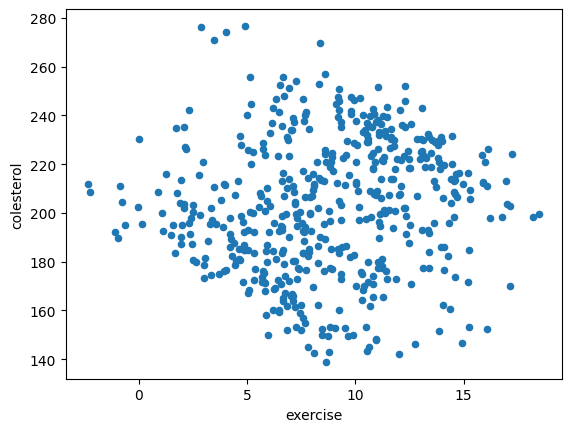

In [187]:
data.plot.scatter("exercise", "colesterol")

In [ ]:
fit = lm("colesterol ~ exercise", data)

,estimate,standard error,t-statistic,p-value
Intercept,197.127831,2.996137,65.793989,0.0
exercise,0.633311,0.313554,2.019784,0.043941
sigma,27.385991,,,


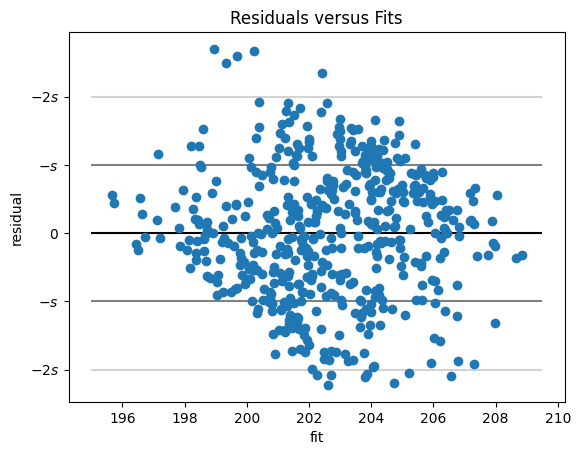

In [ ]:
s = fit.se
plt.scatter(y_pred, r)
plt.hlines(
    [-2 * s, -s, 0, s, 2 * s],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks([-2 * s, -s, 0, s, 2 * s], ["$-2s$", "$-s$", "$0$", "$-s$", "$-2s$"])
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

In [195]:
s

28.63633335525853